# Charging and Discharging of Capacitors
Date: 11 March 2025 <br>
Author: Dev Khullar

In [1]:
import numpy as np
# %matplotlib ipympl
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

import scienceplots  
plt.style.use(['science','notebook', 'grid'])

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

### Charging the Capacitor

In [2]:
# load the data set
df = pd.read_excel('charging.xlsx')

data_array = df.to_numpy()
transposed_array = data_array.transpose()
x = np.array(transposed_array[0])
y = np.array(transposed_array[1])

We do not need all the data points in this data set as a huge portion of the data belongs to the data from the previous cycle so we can remove .

In [3]:
# slicing the arrays with trial and error
# to only get the portions relating to the data
# that we want to plot
a1 = x[950:]
b1 = y[950:]

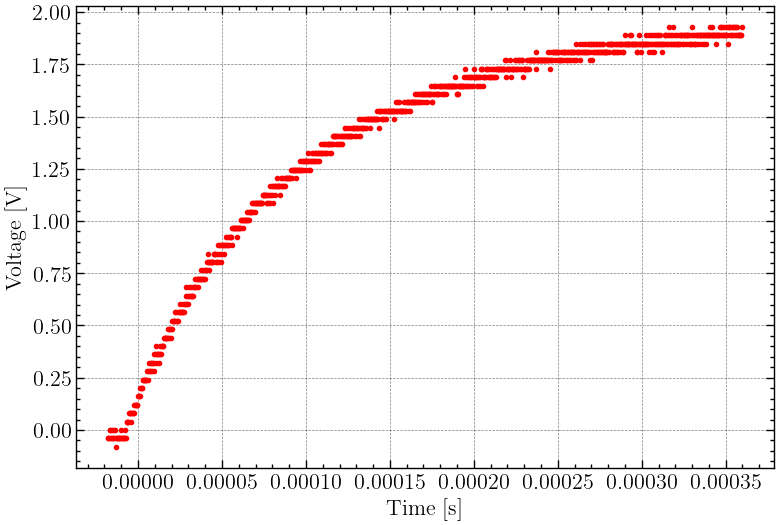

In [4]:
# Plotting the sliced arrays
# we want this arc shaped figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
ax.plot(a1, b1, 'r.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
# plt.savefig("charging_voltage.png")
plt.show()

We want to find the time constant RC. For the case of charging the capacitor, we know $$V = V_s(1 - e^{-t/RC}).$$ By some algebra, we get $$-ln(1-\frac{V}{V_s}) = \frac{t}{RC},$$
We now plot this to find the time constant.

In [7]:
# Slice the data through some trial and error
# to only include the data points of need
a2 = a1[:401]
V_source = 2 # Volts
b2 = np.log(1-b1[:401]/V_source)
# plt.plot(a2, b2, 'ro')

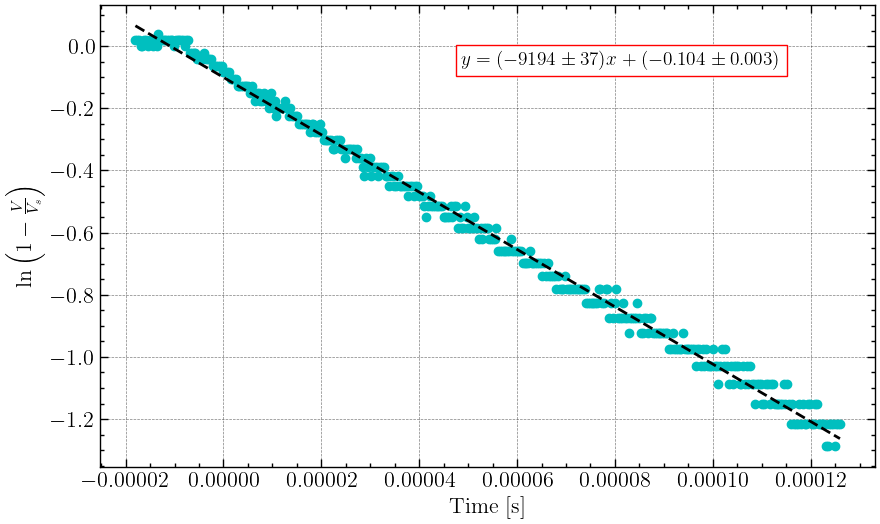

In [20]:
coef1 = np.polyfit(a2, b2, 1)
poly1d_fn1 = np.poly1d(coef1)
plt.figure(figsize=(10,6))
plt.plot(a2, b2, 'co', a2, poly1d_fn1(a2), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel(r'Time [s] ')
plt.ylabel(r'$\ln \left(1-\frac{V}{V_s}\right)$')
plt.text(0.5, 0.85, '$y = (-9194 \pm 37)x + (-0.104 \pm 0.003)$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red'))
plt.savefig('logV_charging.png')
plt.show()

# slope: 3952+-15
# intercept: 0.048+-0.001



### Discharging the Capacitor

In [15]:
# load the data set
df1 = pd.read_excel('discharge.xlsx')

data_array = df1.to_numpy()
transposed_array = data_array.transpose()
x1 = np.array(transposed_array[0])
y1 = np.array(transposed_array[1])

In [16]:
# Slice data to use only the required data
x2 = x1[950:]
y2 = y1[950:]

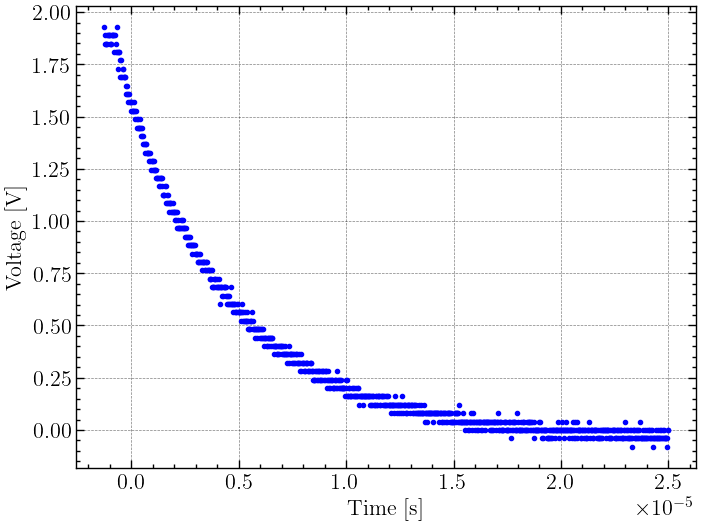

In [4]:
# Plotting the discharging case
plt.plot(x2, y2, 'b.')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.show()
# plt.savefig("discharging_voltage.png")

We are interested in finding RC, the time constant. 
We know that $$V = V_o e^{-t/RC}$$. By taking the natural log of both sides, we get, $$\ln V = \ln V_o - \frac{t}{RC}.$$
So, by plotting the natural log of V plotted as a function of time, we get the slope of $-1/RC$. And then we use perform linear regression to find the slope.

In [17]:
x3 = x2[50:300]
y3 = np.log10(y2[50:300])

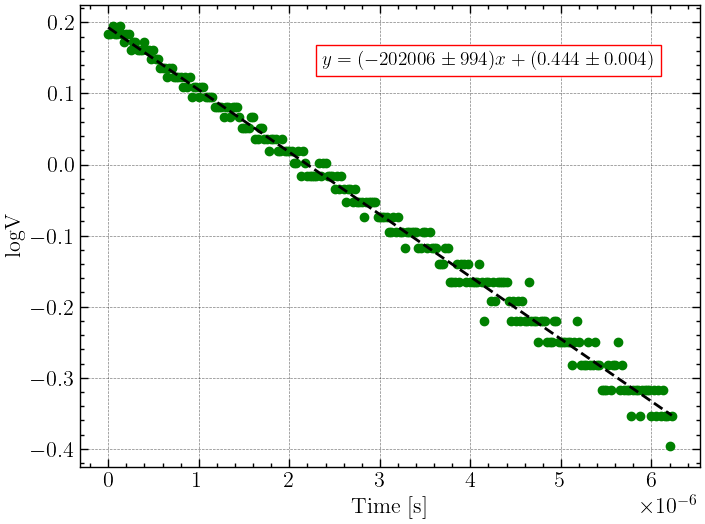

In [19]:
coef = np.polyfit(x3,y3,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x3, y3, 'go', x3, poly1d_fn(x3), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel(r'$\frac{L}{A}$ $[m^{-1}]$')
plt.ylabel(r'Resistance [$\Omega$]')
plt.text(0.3, 0.85, '$y = (-202006\pm 994)x + (0.444 \pm 0.004)$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='red'))
plt.xlabel("Time [s]")
plt.ylabel("logV")
plt.savefig('logV_discharging.png')
plt.show()
# slope: -87100 +- 948
# intercept: 0.191+-0.002